# Global indicator project
## Create sample points over OSM pedestrain network

This notebook creates sample points over the OSM pedestrian street networks from OpenStreetMap using OSMnx. This approach is taken to calculate location based indicators for local analysis (e.g. street connectivity; daily living access).   

Process:
1. Load or create study region network graph and edge shapefile
2. Create nodes at regular intervals as sample points using ox.redistribute_vertices
3. Save sample point shapefile at OSM folder

In [14]:
# Libraries used for OSMnx analyses and output
import networkx as nx
import time 
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import geopandas as gpd
import os
import setup_OSMnetwork

from descartes import PolygonPatch
from shapely.geometry import shape, Point, LineString, Polygon
from setup_OSMnetwork import get_OSM_G, get_OSM_edges_gdf



### Set up project config

In [18]:
placename = 'phoenix' # place name

region = 'Arizona, USA' # study region name

suffix = '_201905' # output data time

buffer_dist = 1e4 # study region buffer 10km

point_dist = 30 # sample point interval distance

network_type = 'walk' # OSM network type

OSM_folder = '../data/OSM' # folder path to save OSM data 

G_filename = 'phoenix_proj_walk_201905.graphml' # study region OSM network graphml filename

shapefile_path = '../data/OSM/phoenix_walk_201905/phoenix_proj_walk_201905.shp' # study region OSM network shapefile path

## Load or create study region network graph and edge shapefile

In [ ]:
## Load pedestrain street network graphml and edge shapefile from local folder
G = get_OSM_G(G_filename, OSM_folder)

In [17]:
edges_gdf = get_OSM_edges_gdf(shapefile_path, OSM_folder, polygon=None)

## Create sample points

In [3]:
# function to create sample point, this function assumes network edge shapefile exit in local folder
def create_sample_points_gdf(gdf, point_dist=30):
    #get sample point
    gdf['points'] = gdf.apply(lambda x: ox.redistribute_vertices(x.geometry, point_dist), axis=1)
    # develop edges data for each created points
    point_df = gdf['points'].apply([pd.Series]).stack().reset_index(level=1, drop=True).join(gdf).reset_index()
    point_gdf = gpd.GeoDataFrame(point_df, geometry=point_df.Series)
    return point_gdf

In [4]:
# create sample points geodataframe and edge data
points_gdf = create_sample_points_gdf(edges_gdf, point_dist=30)
points_gdf.columns

In [5]:
# save sample point shapefile
ox.save_gdf_shapefile(points_gdf, filename='{studyregion}_sample_points{suffix}'.format(
        studyregion = placename, suffix = suffix), folder=OSM_folder)

In [5]:
# define a testing sample points to load for analysis later for efficiency purpose  
testing_sample = points_gdf[0:100]

ox.save_gdf_shapefile(testing_sample, filename='{studyregion}_testing_sample_points{suffix}'.format(
        studyregion = placename, suffix = suffix), folder=OSM_folder)

/Users/NGAU/miniconda3/envs/asa/lib/python3.7/site-packages/osmnx/save_load.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  gdf[col] = gdf[col].fillna('').map(make_str)


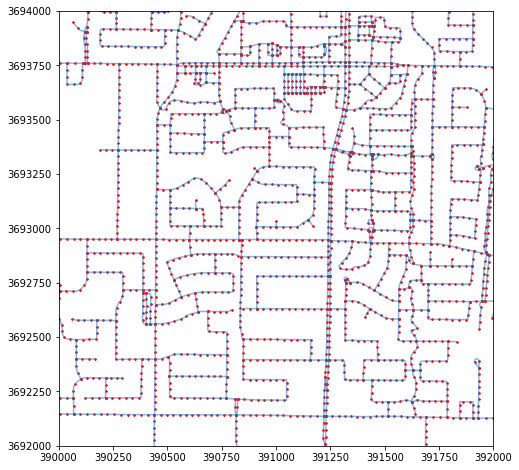

In [12]:
# plot to examine the distribution
fig, ax = plt.subplots(figsize=(8, 8))
ax = edges_gdf.plot(ax=ax, alpha=0.3)
ax = points_gdf.plot(ax=ax, color='red', markersize=1.5)
ax.set_xlim(390000, 392000)
ax.set_ylim(3692000, 3694000)
#ax.axis('off')
plt.show()